1. Tentukan Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import accuracy_score 

2. Load Dataset

In [2]:
hasilpanen_dataset = pd.read_csv('dataset_hasilpanen.csv')

3. Keterangan dataset 

HPK = Hasil Panen Melati Ukuran Kecil (kg)

HPB = Hasil Panen Melati Ukuran Besar (kg)

LL = Luas Lahan Panen (m2)

FC = Faktor Cuaca

PS = Pestisida

PK = Pupuk

4. Keterangan Transformasi Numerik

0 = Menurun

1= Meningkat

2 = Panas

3 = Hujan

4 = 4000 m2

5 = 6000 m2

6 = Tidak Pakai

7 = Pakai

8 = Tidak

9 = Ya

In [3]:
hasilpanen_dataset.head()

,HPK,HPB,LL,FC,PS,PK,Status
0,14.6,0.8,4,2,6,8,1
1,10.1,1.0,4,2,6,8,0
2,8.0,1.2,4,2,7,8,0
3,8.5,0.6,4,3,6,8,0
4,14.7,0.5,4,3,7,8,1


In [4]:
hasilpanen_dataset.shape

(742, 7)

In [5]:
hasilpanen_dataset['Status'].value_counts()

Status
0    455
1    287
Name: count, dtype: int64

In [6]:
# memisahkan data dan label
X = hasilpanen_dataset.drop (columns='Status', axis=1)
Y = hasilpanen_dataset['Status']

In [7]:
print(X)

      HPK  HPB  LL  FC  PS  PK
0    14.6  0.8   4   2   6   8
1    10.1  1.0   4   2   6   8
2     8.0  1.2   4   2   7   8
3     8.5  0.6   4   3   6   8
4    14.7  0.5   4   3   7   8
..    ...  ...  ..  ..  ..  ..
737   7.5  1.0   5   2   6   8
738   5.1  1.5   5   2   6   8
739   1.2  1.5   5   2   6   8
740   2.6  1.3   5   2   7   8
741   4.3  0.8   5   2   6   8

[742 rows x 6 columns]


In [8]:
print(Y)

0      1
1      0
2      0
3      0
4      1
      ..
737    0
738    0
739    0
740    0
741    0
Name: Status, Length: 742, dtype: int64


5. Memisahkan Data Training dan Data Testing

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=2)

In [10]:
print(X.shape, X_train.shape, X_test.shape)

(742, 6) (593, 6) (149, 6)


6. Membuat Data Latih dengan Algoritma KNN

In [11]:
knn = KNeighborsClassifier(n_neighbors=11, metric='euclidean').fit(X_train, Y_train)
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

7. Membuat Model Evaluasi untuk Mengukur Tingkat Akurasi

In [12]:
X_train_prediction = knn.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [13]:
print('Akurasi Data Training adalah = ', train_data_accuracy)

Akurasi Data Training adalah =  0.9527824620573356


In [14]:
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [15]:
print('Akurasi Data Testing adalah = ', test_data_accuracy)

Akurasi Data Testing adalah =  0.9261744966442953


Accuracy :  0.912751677852349
Precision :  0.8620689655172413
Recall :  0.9090909090909091
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        94
           1       0.86      0.91      0.88        55

    accuracy                           0.91       149
   macro avg       0.90      0.91      0.91       149
weighted avg       0.91      0.91      0.91       149



<Axes: >

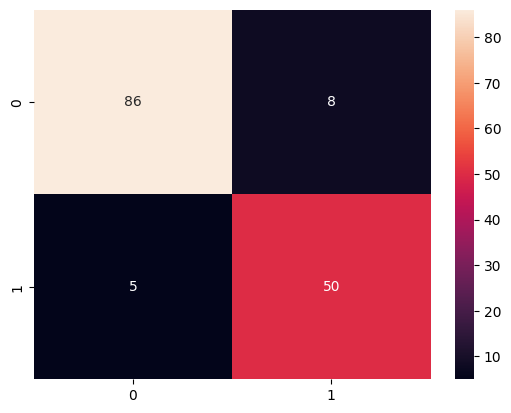

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sb

# Accuracy
print("Accuracy : ", metrics.accuracy_score(X_test_prediction, Y_test))

# Precision Score
print("Precision : ", metrics.precision_score(X_test_prediction, Y_test))

# Recall Score
print("Recall : ", metrics.recall_score(X_test_prediction, Y_test))

print(metrics.classification_report(X_test_prediction, Y_test))
sb.heatmap(confusion_matrix(X_test_prediction, Y_test), annot=True)

8. Mencari Nilai K

In [32]:
akurasi_k = []
for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean').fit(X_train,Y_train)
    X_test_prediction = knn.predict(X_test)
    test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
    akurasi_k.append(test_data_accuracy)

print(akurasi_k)

[0.9395973154362416, 0.9395973154362416, 0.9395973154362416, 0.9395973154362416, 0.9395973154362416, 0.9328859060402684, 0.9261744966442953, 0.9261744966442953, 0.9328859060402684, 0.9395973154362416, 0.9261744966442953, 0.9261744966442953, 0.9328859060402684, 0.9328859060402684, 0.9261744966442953, 0.912751677852349, 0.9060402684563759, 0.9060402684563759, 0.912751677852349, 0.912751677852349, 0.9060402684563759, 0.912751677852349, 0.9060402684563759, 0.9060402684563759, 0.9060402684563759, 0.9194630872483222, 0.9194630872483222, 0.9261744966442953, 0.9261744966442953]


<function matplotlib.pyplot.show(close=None, block=None)>

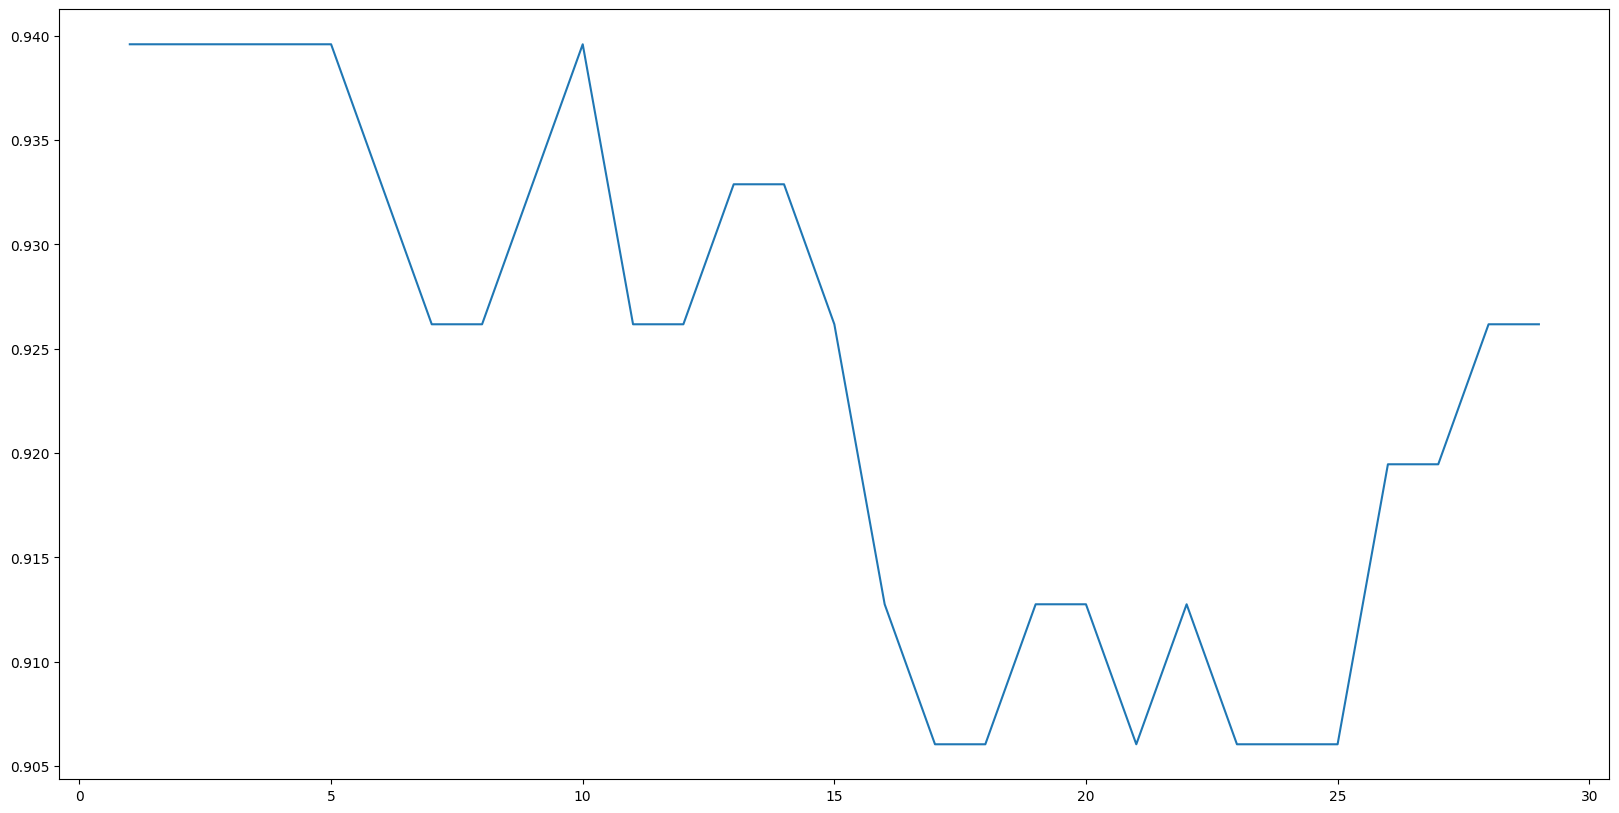

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(range (1,30), akurasi_k)
plt.show

9. Simpan Model

In [24]:
import pickle

In [25]:
filename = 'hasilpanenmlt_model.sav'
pickle.dump(knn, open(filename, 'wb'))